# Projeto de Design de Experimentos (DOE) da Catapulta Virtual

* Rafael Ribeiro 
* Arthur Ferreira
* Tiago Miguel 
* Octávio Almeida 
* Gabriel Pasquotto 

##  Entendendo o Problema:

* Vamos começar com os fatores que podem afetar a distância alcançada pela catapulta. Os fatores são: elevação do pino, elevação do copo, posição da liga, angulo de tiro da catapulta e ângulo do lançamento da catapulta. Esses fatores, são as variáveis de entrada da catapulta.

## Design do Experimento e Realização do Experimento

* No nosso Design do Experimento realizamos um design fatorial fracionado, onde cada fator é testado em dois níveis, e é realizado um número reduzido de experimentos para explorar as principais interações entre os fatores. Portanto, o design experimental gerou no inicio 16 combinações diferentes dos níveis dos fatores para você realizar os experimentos. Nossa distância planejada é 250.

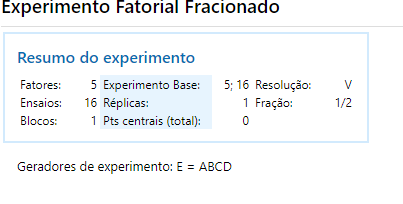

## Análise de Variância (ANOVA)

In [ ]:
import pandas as pd
import pyDOE2
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
dados = pd.DataFrame({
    'OrdemPad': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'OrdemEns': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'PtCentral': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Blocos': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Realease Angle': [135, 185, 135, 185, 135, 185, 135, 185, 135, 185, 135, 185, 135, 185, 135, 185],
    'Firing Angle': [90, 90, 120, 120, 90, 90, 120, 120, 90, 90, 120, 120, 90, 90, 120, 120],
    'Cup Angle': [200, 200, 200, 200, 300, 300, 300, 300, 200, 200, 200, 200, 300, 300, 300, 300],
    'Pin Elevation': [100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 200, 200, 200, 200, 200, 200],
    'Bungee Position': [200, 100, 100, 200, 100, 200, 200, 100, 100, 200, 200, 100, 200, 100, 100, 200],
    'Distância': [83.60, 86.40, 20.68, 192.77, 98.28, 193.46, 102.72, 200.38, 78.36, 166.50, 89.02, 215.65, 187.39, 196.76, 92.87, 639.92]
})

In [10]:
# Definir os níveis dos fatores
levels = 2

In [11]:
# Gerar o design experimental usando a função ff2n do pyDOE2
design = pyDOE2.ff2n(5)

In [12]:
# Converter o design em um DataFrame usando pandas
design_df = pd.DataFrame(design, columns=['RealeaseAngle', 'FiringAngle', 'CupAngle', 'PinElevation', 'BungeePosition'])

# Combinar o design experimental com os dados da distância
data = pd.concat([design_df, dados['Distância']], axis=1)

In [13]:
# Definir o modelo de ANOVA
modelo = ols('Distância ~ C(RealeaseAngle) + C(FiringAngle) + C(CupAngle) + C(PinElevation) + C(BungeePosition)', data=data).fit()

# Realizar a ANOVA
anova_tabela = sm.stats.anova_lm(modelo)

# Imprimir a tabela ANOVA
print(anova_tabela)


                     df         sum_sq       mean_sq         F    PR(>F)
C(RealeaseAngle)    1.0   81071.172900  81071.172900  6.812130  0.024257
C(FiringAngle)      1.0   13413.114225  13413.114225  1.127058  0.311157
C(CupAngle)         1.0   37908.090000  37908.090000  3.185285  0.101875
C(PinElevation)     1.0   29599.482025  29599.482025  2.487142  0.143084
C(BungeePosition)   1.0     787.432997    787.432997  0.066165  0.801752
Residual           11.0  130911.028350  11901.002577       NaN       NaN


* Para determinar o fator mais importante, é concentrado no valor de p(PR(>F)). Sendo menor o valor de p, mais significativo é o fator. Então, bom base no resultado da tabela ANOVA, o fator mais importante é o RealeseAngle, com um valor de p = 0.024257

### Em seguida, realizamos um gráfico para mostrar de forma gráfica que o fator A, é o fator mais significativo

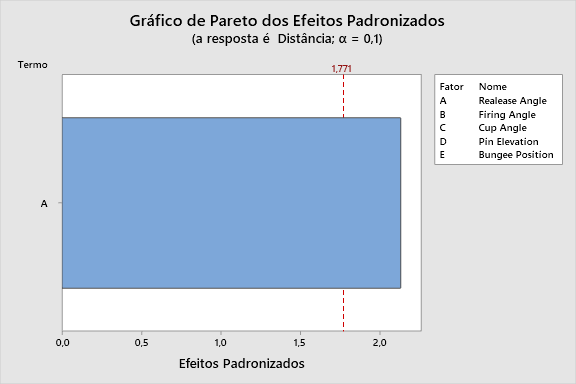

## Começando a Otimização com o Minitab

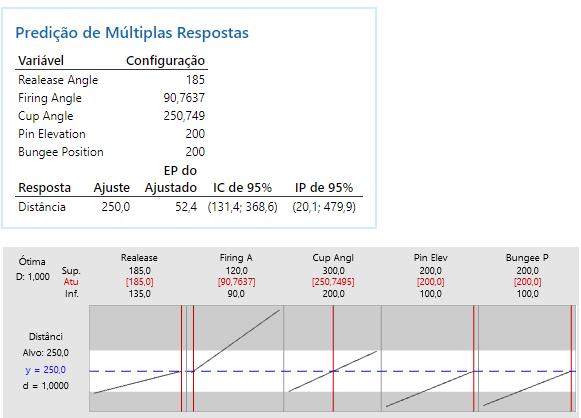

* De acordo com a nossa primeira otimização, nós não atingimos a distância que planejamos que no caso é 250. Olhando pelos valores do IC ( Indice de Confiança) que está bem extenso, já era notável que não iria atingir a distância que queriamos. No entanto, precisamos refinar mais nossa otimização. 
* Realizamos de primeira mão o experimento fracionado para ver se tinha a possibilidade de diminuir os fatores, mas nesse caso, todos os fatores da catapulta são significativos

### Gráfico de contorno para ver as configurações que devemos utilizar para atingir uma distância de 250

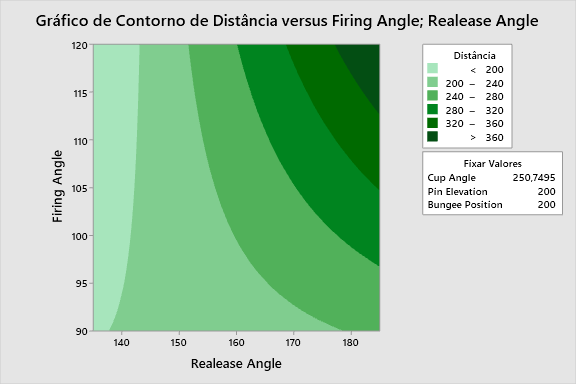

* Para atingirmos a distância planejada, temos que colocar a configuração da otimização entre 240 a 280

## Realizando a otimização com a configuração correta

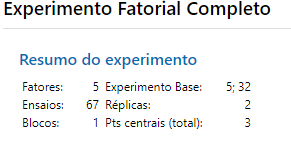

* O experimento consiste em 5 níveis e o número total de combinações possíveis é 32
* O experimento possui 67 ensaios. 
* Cada ensaio foi repetido duas vezes
* O experimento foi realizado em um único bloco
* Os pontos centrais são combinações especiais dos níveis dos fatores que são repetidos para verificar a confiabilidade dos resultados experimentais.


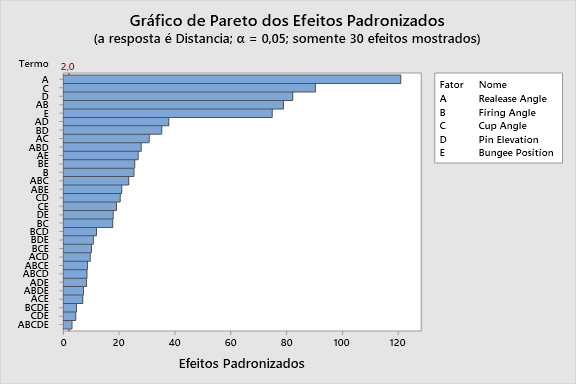

* Interação entre três ou quatro fatores são significativas, como por exemplo BCD ou ABCE
* A, C, D, E são os mais significativos para nossa avaliação, sendo o A o mais significativo

## Otimização

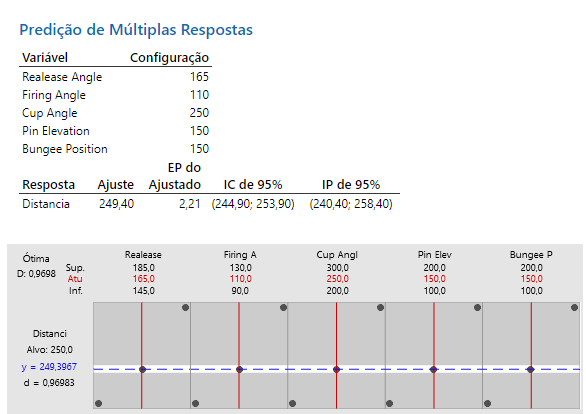

* Com essa otimização conseguimos atingir a distância planejada. Com nosso Indice de Confiança entre 244,90 e 253,90.
* Para atingir o valor de 250 de distância, colocamos os valores dos fatores em vermelho na nossa catapulta virtual e obtivemos sucesso.